In [289]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from subprocess import check_output

In [290]:
data = pd.read_csv('auto-mpg.csv',index_col='car name')

In [291]:
print(data.head())
print(data.index)
print(data.columns)

                            mpg  cylinders  displacement horsepower  weight  \
car name                                                                      
chevrolet chevelle malibu  18.0          8         307.0        130    3504   
buick skylark 320          15.0          8         350.0        165    3693   
plymouth satellite         18.0          8         318.0        150    3436   
amc rebel sst              16.0          8         304.0        150    3433   
ford torino                17.0          8         302.0        140    3449   

                           acceleration  model year  origin  
car name                                                     
chevrolet chevelle malibu          12.0          70       1  
buick skylark 320                  11.5          70       1  
plymouth satellite                 11.0          70       1  
amc rebel sst                      12.0          70       1  
ford torino                        10.5          70       1  
Index(['chev

In [292]:
data.shape

(398, 8)

In [293]:
data.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
dtype: bool

In [294]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [295]:
data.horsepower.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [296]:
data = data[data.horsepower != '?']

In [297]:
print('?' in data.horsepower)

False


In [298]:
data.shape

(392, 8)

In [299]:
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [300]:
data.horsepower = data.horsepower.astype('float')
data.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [301]:

data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [302]:
data.mpg.describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

<Axes: xlabel='mpg', ylabel='Density'>

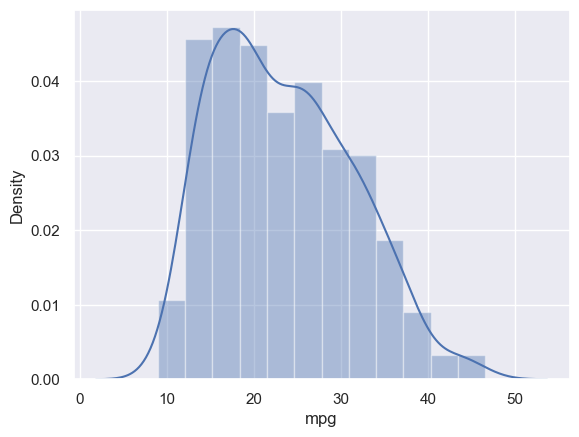

In [303]:
sns.distplot(data['mpg'])


In [304]:
print("Skewness: %f" % data['mpg'].skew())
print("Kurtosis: %f" % data['mpg'].kurt())

Skewness: 0.457092
Kurtosis: -0.515993


In [305]:
def scale(a):
    b = (a-a.min())/(a.max()-a.min())
    return b

In [306]:
data_scale = data.copy()

In [307]:
data_scale ['displacement'] = scale(data_scale['displacement'])
data_scale['horsepower'] = scale(data_scale['horsepower'])
data_scale ['acceleration'] = scale(data_scale['acceleration'])
data_scale ['weight'] = scale(data_scale['weight'])
data_scale['mpg'] = scale(data_scale['mpg'])

In [308]:
data_scale.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
chevrolet chevelle malibu,0.239362,8,0.617571,0.456522,0.536150,0.238095,70,1
buick skylark 320,0.159574,8,0.728682,0.646739,0.589736,0.208333,70,1
plymouth satellite,0.239362,8,0.645995,0.565217,0.516870,0.178571,70,1
amc rebel sst,0.186170,8,0.609819,0.565217,0.516019,0.238095,70,1
ford torino,0.212766,8,0.604651,0.510870,0.520556,0.148810,70,1


In [309]:
# making country codes easy to read
data['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])
data_scale['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])

In [310]:
data_scale.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,Country_code
car name,,,,,,,,,
chevrolet chevelle malibu,0.239362,8,0.617571,0.456522,0.536150,0.238095,70,1,USA
buick skylark 320,0.159574,8,0.728682,0.646739,0.589736,0.208333,70,1,USA
plymouth satellite,0.239362,8,0.645995,0.565217,0.516870,0.178571,70,1,USA
amc rebel sst,0.186170,8,0.609819,0.565217,0.516019,0.238095,70,1,USA
ford torino,0.212766,8,0.604651,0.510870,0.520556,0.148810,70,1,USA


MPG/Origin Boxplot: Japan tends to have better MPG.

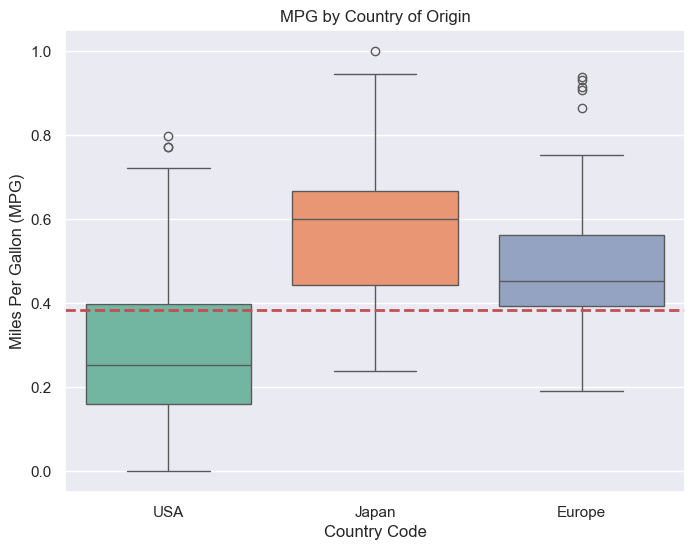

In [334]:
# Creating plot to show relationship b/n mpg and country of origin
var = 'Country_code'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
# Adding colors for each country
fig = sns.boxplot(x=var, y="mpg", data=data_plt, palette='Set2')
# Adding a line for the mean
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

plt.title('MPG by Country of Origin')
plt.xlabel('Country Code')
plt.ylabel('Miles Per Gallon (MPG)')
plt.show()

MPG/Year Boxplot: Later years tend to have better MPG.

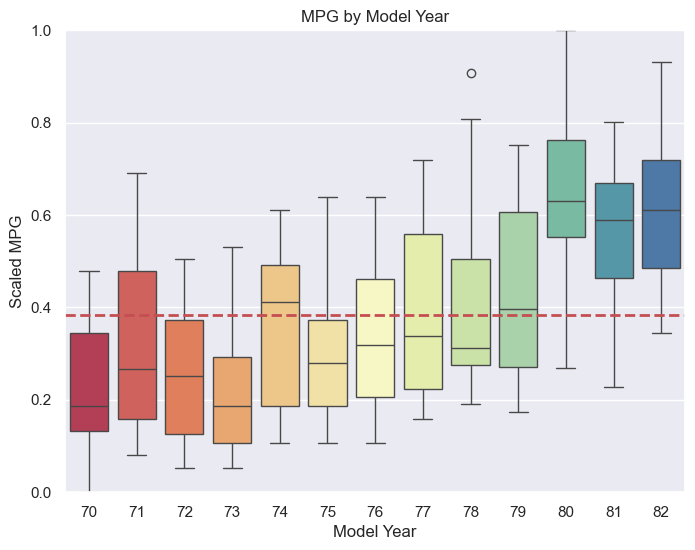

In [335]:
# Creating plot to show relationship between year manufactured and MPG
var = 'model year'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
# Adding color
fig = sns.boxplot(x=var, y="mpg", data=data_plt, palette='Spectral')
# Setting the axis to be between 0 and 1 to show relativity
fig.axis(ymin=0, ymax=1)
# Adding a horizontal line to depict the mean
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

plt.title('MPG by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Scaled MPG')

plt.show()

In [315]:
# Creating a map that sets the first word of the car to the Company Name
data['Company_Name'] = data.index.map(lambda x: x.split()[0])

In [318]:
# Fixes some typos
data['Company_Name'] = data['Company_Name'].replace(['volkswagen','vokswagen','vw'],'VW')
data['Company_Name'] = data['Company_Name'].replace('maxda','mazda')
data['Company_Name'] = data['Company_Name'].replace('toyouta','toyota')
data['Company_Name'] = data['Company_Name'].replace('mercedes','mercedes-benz')
data['Company_Name'] = data['Company_Name'].replace('nissan','datsun')
data['Company_Name'] = data['Company_Name'].replace('capri','ford')
data['Company_Name'] = data['Company_Name'].replace(['chevroelt','chevy'],'chevrolet')
data['Company_Name'].fillna(value = 'subaru',inplace=True)

Manufacturer/MPG Boxplot: Datsun, VW, and Toyota tend to have the best MPG.

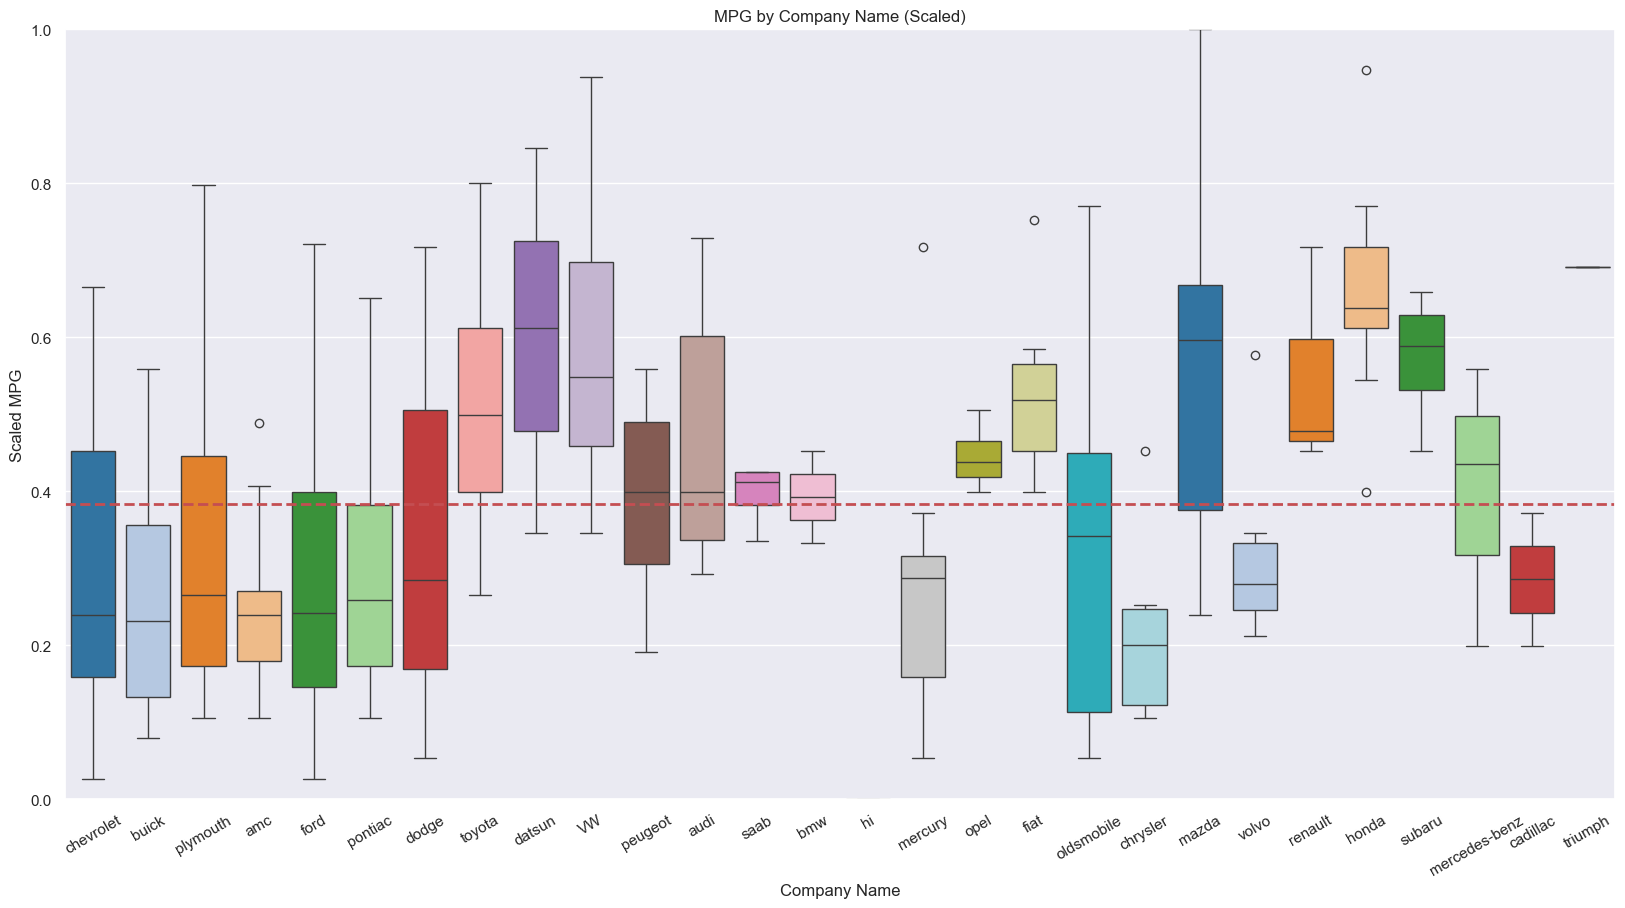

In [336]:
# Creating a plot to show relationship between manufacturer and MPG
var = 'Company_Name'
data_plt = pd.concat([data_scale['mpg'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(20,10))

# Sets a color palette
fig = sns.boxplot(x=var, y="mpg", data=data_plt, palette='tab20')
fig.set_xticklabels(ax.get_xticklabels(),rotation=30)
# Sets range from 0 to 1 to demonstrate relative differences
fig.axis(ymin=0, ymax=1)
# Adds a horizontal line to depict the mean
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

plt.title('MPG by Company Name (Scaled)')
plt.xlabel('Company Name')
plt.ylabel('Scaled MPG')

plt.show()

Displacement/MPG scatterplot showing negative correlation.

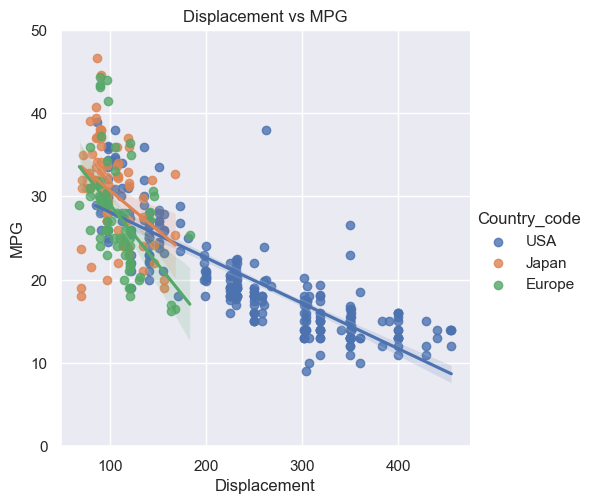

In [337]:
var = 'displacement'
# Creates a scatter plot colored by country code for distinguishing.
# Compares displacement and MPG
plot = sns.lmplot(x=var, y='mpg', data=data, hue='Country_code')
# Sets the axis to exclusively the most relevant range of MPG
plot.set(ylim=(0, 50))

plt.title('Displacement vs MPG')
plt.xlabel('Displacement')
plt.ylabel('MPG')

plt.show()

Weight/MPG scatterplot showing negative correlation.

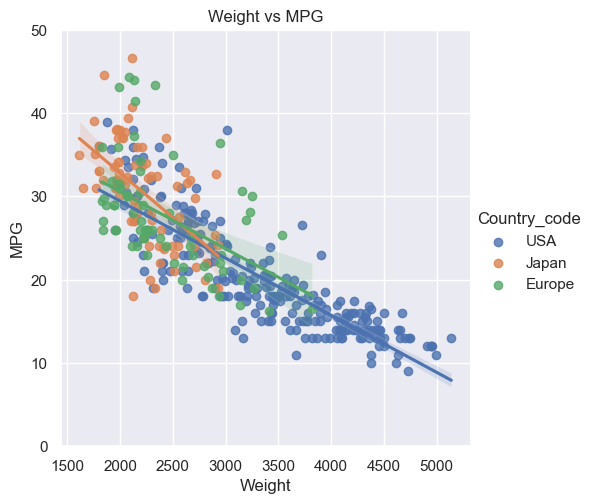

In [338]:
var = 'weight'
# Creates a scatterplot colored by country code
# Shows MPG vs Weight
plot = sns.lmplot(x=var, y='mpg', data=data, hue='Country_code')
# Sets range to be exclusively the relevant range of MPG
plot.set(ylim=(0, 50))

plt.title('Weight vs MPG')
plt.xlabel('Weight')
plt.ylabel('MPG')

plt.show()

Is there a relationship between horsepower and acceleration?

In [324]:
# Sets horsepower variable
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')

In [325]:
# Cleans null values
data.dropna(subset=['horsepower'], inplace=True)

Scatterplot showing that the more horsepower, the faster the car accelerates. (technically positive correlation, although seconds decreases as horsepower increases)

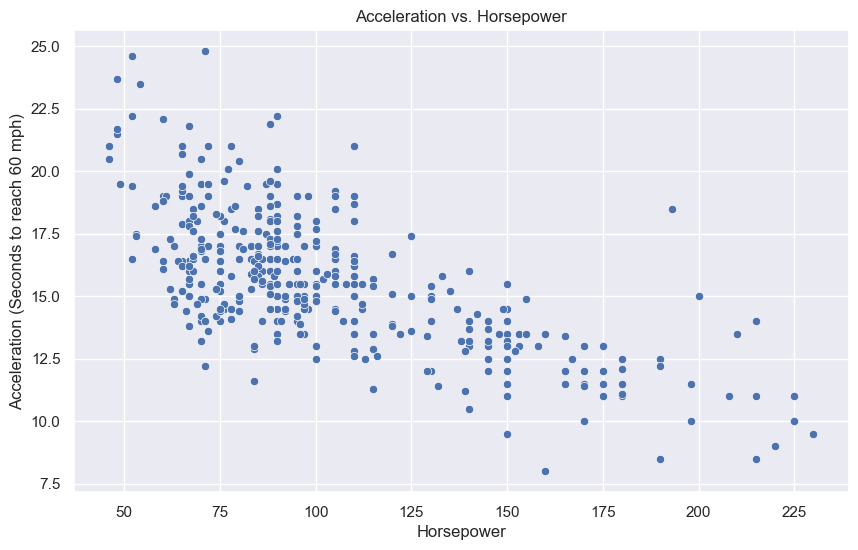

In [339]:
# Sets size of the plot
plt.figure(figsize=(10, 6))
# Creates horsepower vs acceleration scatterplot
sns.scatterplot(x='horsepower', y='acceleration', data=data)

plt.title('Acceleration vs. Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Acceleration (Seconds to reach 60 mph)')
plt.show()

Is there a relationship between Cylinders and Displacement?

Boxplot showing the more cylinders, the more displacement (positive correlation)

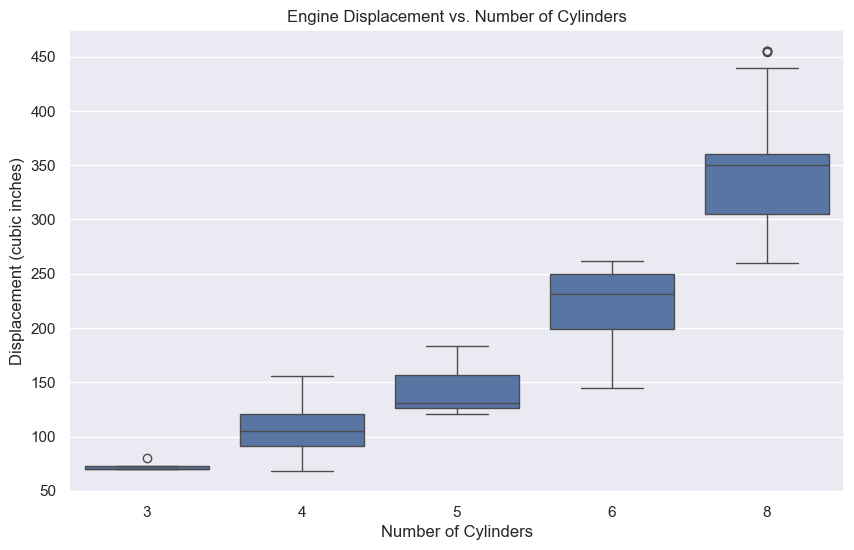

In [340]:
# Sets size of the boxplot
plt.figure(figsize=(10, 6))
# Creates the boxplot
sns.boxplot(x='cylinders', y='displacement', data=data)

plt.title('Engine Displacement vs. Number of Cylinders')
plt.xlabel('Number of Cylinders')
plt.ylabel('Displacement (cubic inches)')
plt.show()